In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('house_price_tree.csv')
df.head()

,size_m2,bedrooms,location_score,price_category
0,90.6,5,3.8,Medium
1,70.1,2,6.0,Low
2,129.1,5,3.7,Medium
3,170.8,1,9.0,High
4,177.3,5,5.1,High


In [25]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size_m2         150 non-null    float64
 1   bedrooms        150 non-null    int64  
 2   location_score  150 non-null    float64
 3   price_category  150 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [26]:
df['price_category'].value_counts()

price_category
Medium    69
High      44
Low       37
Name: count, dtype: int64

In [27]:
df['price_category']=df['price_category'].str.strip()

In [29]:
df

,size_m2,bedrooms,location_score,price_category
0,90.6,5,3.8,1
1,70.1,2,6.0,0
2,129.1,5,3.7,1
3,170.8,1,9.0,2
4,177.3,5,5.1,2
...,...,...,...,...
145,145.7,1,4.4,1
146,85.1,2,6.6,1
147,162.8,1,6.2,2
148,110.0,5,3.7,1


<Axes: >

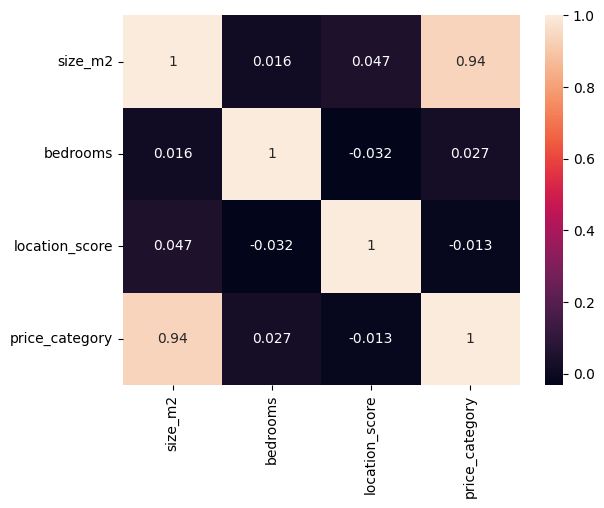

In [31]:
sns.heatmap(df.corr(),annot=True)

In [39]:
def correlated(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
corr=correlated(df,0.85)
print(corr)

{'price_category'}


<Axes: xlabel='price_category', ylabel='Density'>

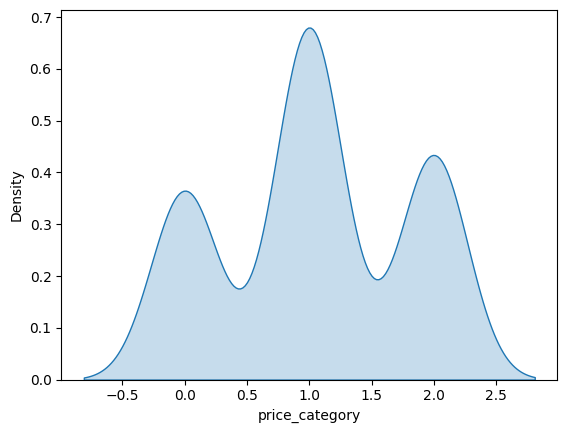

In [42]:
sns.kdeplot(df['price_category'],fill=True)

<Axes: xlabel='size_m2', ylabel='Density'>

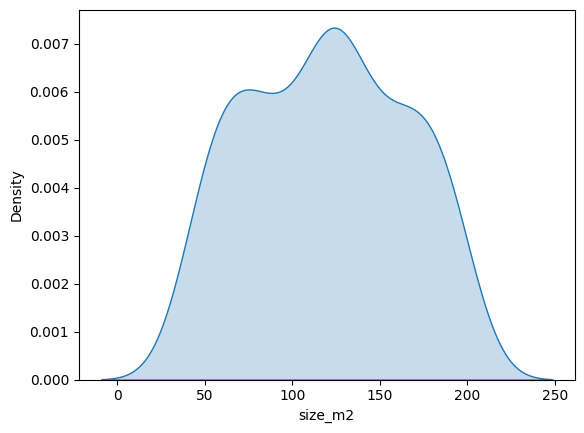

In [43]:
sns.kdeplot(df['size_m2'],fill=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
x=df[['size_m2','price_category','location_score']]
y=df['price_category']
x_train,x_test,y_train,y_test=train_test_split(x,y,testsize=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform()
x_test=scaler.transform()
model=DecisionTreeClassifier(random_state=42,max_depth=3)
model.fit(x_train,y_train)

